# Projeto 2: Análise Exploratória do Email Pessoal

*Baseado no código do capítulo 3 do livro "Hands on Exploratory Data Analysis with Python", com os códigos disponíveis no [github](https://github.com/PacktPublishing/Hands-on-Exploratory-Data-Analysis-with-Python)*.

#### Objetivo: extrair e pre-processar dados do email pessoal do gmail, para responder perguntas sobre os dados obtidos

# Lucas Alves Fidelis Araújo

## Pré processamento dos dados do Email:

In [1]:
import pandas as pd
import mailbox

Utilizei o modelo que o professor disponibilizou no Presencial.

In [2]:
mbox = mailbox.mbox('Caixa de entrada.mbox')

OBS: Esta função abaixo serve para formatar o arquivo .mbox, que originalmente veio com alguns erros na hora de exibir os textos das mensagens, não reconhecendo palavras com qualquer tipo de acento e deixando elas ilegíveis, e posteriormente atrapalhando a exibição da nuvem de palavras no fim da atividade. 

É importante salientar que eu não fiz essa função, ela está disponível no [Stackoverflow](https://stackoverflow.com/questions/60424619/convert-encoded-strings-to-normal-printable-characters), apenas fiz algumas modificações nela, como por exemplo substituir os underlines (que separavam as palavras) por espaços, para facilitar a exibição dos dados na nuvem de palavras.

In [3]:
import os, time
import base64, quopri

def bdecode(s):
    """
    Convert UTF-8 Base64 or Quoted Printable strings to str
    """
    outstr = ""
    if s is None:
        return outstr
    for ss in str(s).splitlines():   # split multiline strings
        sss = ss.strip()
        for sssp in str(sss).split(' '):   # split multiple strings
            if sssp.upper().startswith('=?UTF-8?B?'):
                bbb = base64.b64decode(sssp[10:-2])
                outstr+=bbb.decode("utf-8")
            elif sssp.upper().startswith('=?UTF-8?Q?'):
                bbb = quopri.decodestring(sssp[10:-2])
                outstr+=bbb.decode("utf-8")
            else:
                outstr+=sssp
    return outstr.replace('_',' ')

In [4]:
import csv

with open('emails.csv', 'w',  encoding="utf-8") as outputfile:
  writer = csv.writer(outputfile)
  writer.writerow(['subject','from','date','to',
                   'label','thread'])
    
  for message in mbox:
    subject = message['subject']
    writer.writerow([bdecode(subject), message['from'],  
                     message['date'], message['to'],  
                     message['X-Gmail-Labels'], message['X-GM-THRID']])

In [5]:
df = pd.read_csv('emails.csv')

In [6]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x, 
                                                       errors='coerce', 
                                                       utc=True))

In [7]:
import re

In [8]:
def extracao_email(string):
  email = re.findall(r'<(.+?)>', string) #aqui está a expressão regular
  if not email:
    email = list(filter(lambda y: '@' in y, string.split()))
  return email[0] if email else np.nan #se tiver email, ok; senão, retorna nan.

In [9]:
df['from'] = df['from'].apply(lambda x: extracao_email(x))

In [10]:
df['label'] = df['from'].apply(lambda x: 
                               'enviado' if x=='lukinhas.la780@gmail.com' else 'inbox')

In [11]:
import datetime
import pytz

In [12]:
def ref_timezone(x): return x.astimezone(pytz.timezone('America/Recife'))

In [13]:
df.dropna(inplace=True)

In [14]:
df['dayofweek'] = df['date'].apply(lambda x: x.day_name())

In [15]:
df['dayofweek'] = pd.Categorical(df['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday'], ordered=True)

In [16]:
df['timeofday'] = df['date'].apply(lambda x: x.hour)

In [17]:
df['year'] = df['date'].apply(lambda x: x.year)

In [18]:
df['month'] = df['date'].apply(lambda x: x.month_name())

In [19]:
df['month'] = pd.Categorical(df['month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July',
    'September', 'October', 'November', 'December'], ordered=True)

In [20]:
df['day'] = df['date'].apply(lambda x: x.day)

In [21]:
df['data_contraria'] = df["date"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["data_contraria"],inplace=True)

In [22]:
df.to_csv('emails_processados.csv')

## 1. Quantos emails foram mandados por semana, por mês e por ano, considerando a janela de tempo dos dados baixados?

##### Emails enviados por semana:

Lista com o número de emails:

In [23]:
%matplotlib inline
df_semana = df['data_contraria'].dt.week.value_counts().sort_index(ascending=True)
dados = {'Emails por semana':df_semana}
df_semana = pd.DataFrame(dados)
df_semana

,Emails por semana
1,235
2,305
3,280
4,270
5,289
6,293
7,310
8,315
9,293
10,311


Gráfico:

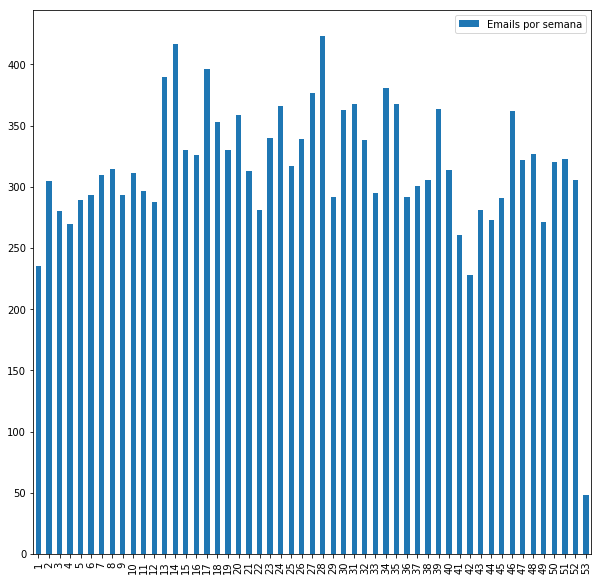

In [24]:
df_semana.plot.bar(figsize= (10,10))

##### Emails enviados por mês:

Lista com o número de emails:

In [25]:
df_mes = df['data_contraria'].dt.month.value_counts().sort_index(ascending=True)
dados = {'Emails por mês':df_mes}
df_mes = pd.DataFrame(dados)

Gráfico:

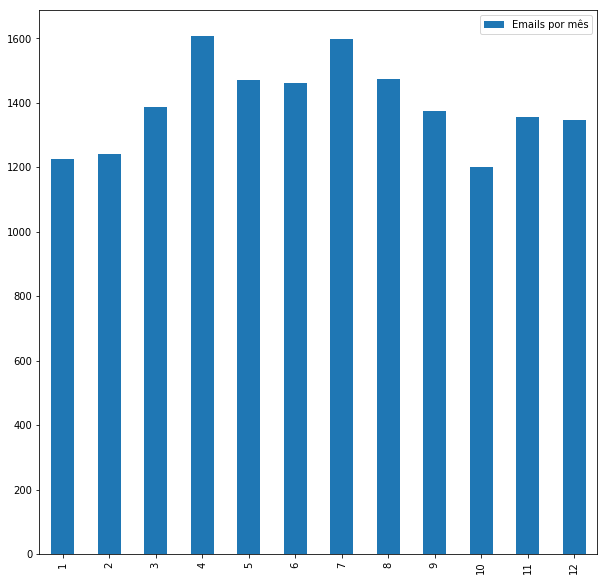

In [26]:
df_mes.plot.bar(figsize= (10,10))

##### Emails enviados por ano:

Lista com o número de emails:

In [27]:
df_ano = df['data_contraria'].dt.year.value_counts().sort_index(ascending=True)
dados = {'Emails por ano':df_ano}
df_ano = pd.DataFrame(dados)

Gráfico:

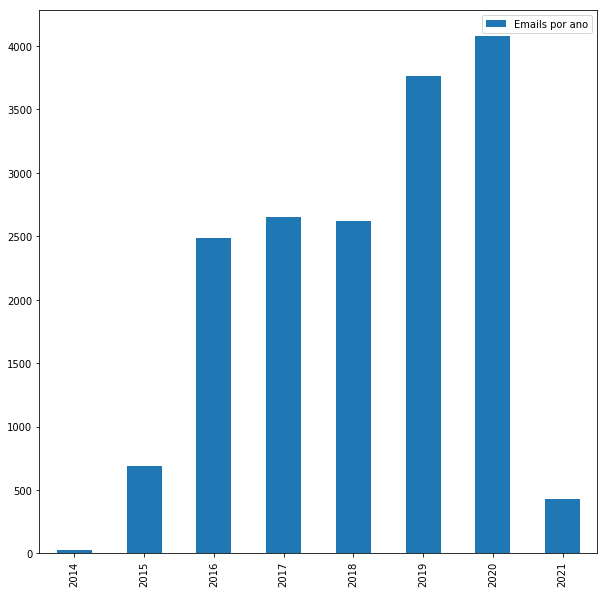

In [28]:
df_ano.plot.bar(figsize= (10,10))

## 2. Há uma variação significativa na quantidade de emails enviados por cada período considerado na questão anterior?

Existe. É visto que em outubro ocorre uma queda no número de emails recebidos, e que os meses de Abril e Julho são os meses que eu mais recebo emails.

Na análise anual, é visto que o número de emails recebidos aumenta a cada ano (com uma leve queda em 2018), e que só nesse período de 2021, eu já recebi mais emails do que todo o ano de 2014.

## 3. Existe algum período, dos considerados nas duas questões anteriores, em que o número de emails enviados possa ser considerado um outlier? Você enxerga alguma justificativa para esse período ter esse outlier, caso haja?

Não consigo ver algum motivo para a queda de emails recebidos em outubro.

Julho geralmente é o mês que eu estou de férias, então eu tenho mais acesso ao meu email, levando ao aumento repentino de emails recebidos.

No ano de 2014, recebi apenas 28 emails. Isto se deve ao fato de eu ter perdido o acesso a minha conta naquele ano, conseguindo recuperar ela apenas em 2015.
    
Em 2019, comecei meu processo de conclusão de curso, pois na época eu fazia o último ano do ensino médio. Então precisei me comunicar muito com os professores por email. Além de que nesse ano, o número de notificações automáticas do Youtube ficou mais frequente, o que influenciou também o ano de 2020.

## 4. Qual é o número médio de e-mails por hora? Essa média varia ao longo da semana?

Para fazer essa questão, escolhi analisar apenas os dados do ano de 2020, visto que seria complicado analisar todos os emails desde 2014. Então, atribuí os emails de 2020 a variável "df_horas":

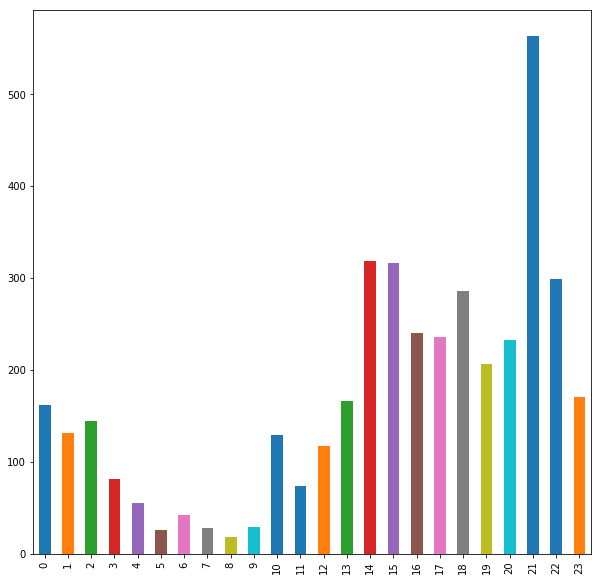

In [29]:
df_horas = df.loc[df['year'] == 2020]
emails_hora = df_horas['timeofday'].value_counts().sort_index(ascending=True)
emails_hora.plot.bar(figsize= (10,10))

Acima, podemos ver o gráfico de números de emails por hora. Percebemos que das 22 horas até as 9 horas o número de emails recebidos caem muito, e aumentam a partir das 10 horas. O número de emails recebidos fica estável das 14 até as 20 horas, e as 21 horas o número de emails recebidos aumenta, totalizando mais de 500 emails recebidos por ano nesse horário.



Lista com o número de emails recebidos em cada hora:

In [30]:
dados = {'Emails por hora': emails_hora}
emails_hora = pd.DataFrame(dados)
emails_hora

,Emails por hora
0,162
1,132
2,145
3,82
4,55
5,26
6,43
7,28
8,19
9,29


Média de emails recebidos por dia e por hora:

In [31]:
total_dia = emails_hora.sum()/365
total_dia

Emails por hora    11.178082
dtype: float64

No ano de 2020, recebemos cerca de 11 emails por dia

In [32]:
total_dia/24

Emails por hora    0.465753
dtype: float64

Em um dia no ano de 2020, recebemos em média cerca de 0.46 emails por hora. (Menos de 1 email recebido por hora)

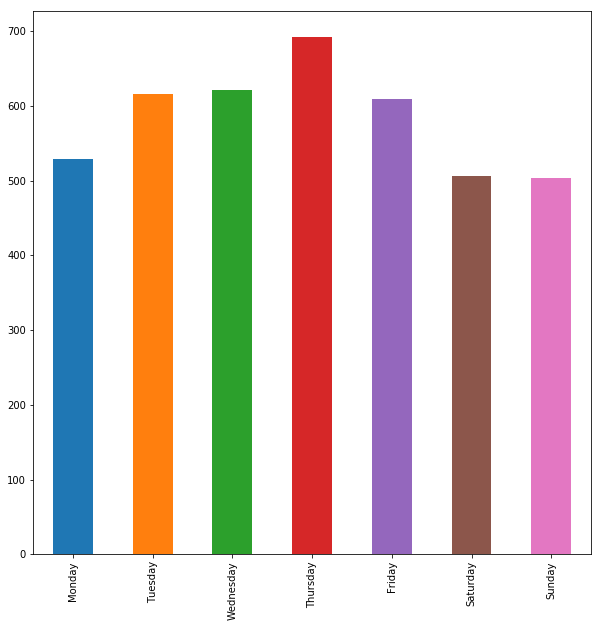

In [33]:
dias_semana = df_horas['dayofweek'].value_counts().sort_index(ascending=True).plot.bar(figsize= (10,10))
dias_semana

Pelo gráfico, podemos ver que a média varia sim. O número de emails recebidos é praticamente o mesmo no Sábado, Domingo e Segunda, e aumenta um pouco nos outros dias, com destaque para a Quinta, que é o dia com o maior número de emails recebidos.

## 5. Com quem me comunico com mais frequência, por meio de emails? Considere tanto por envio, quanto por recepção de emails;

In [34]:
df['from'].value_counts().head(10)

noreply@youtube.com                8732
notify@twitter.com                 2061
info@twitter.com                    841
contact@mailer.humblebundle.com     792
noreply@steampowered.com            383
support@indiegala.com               311
replyto-795248b@plus.google.com     274
verify@twitter.com                  233
no-reply@twitch.tv                  167
pinbot@explore.pinterest.com        137
Name: from, dtype: int64

Notificações automáticas do Youtube e Twitter lideram a lista.

## 6. Quais os temas mais comumente tratados nos emails considerados? (para esse caso, considere usar uma nuvem de palavras como gráfico; para saber mais, veja esse tutorial da Sigmoidal, um tutorial do Datacamp e o Python Graph Gallery);

Para criar a nuvem de imagens, escolhi seguir o tutorial da Sigmoidal.

In [35]:
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

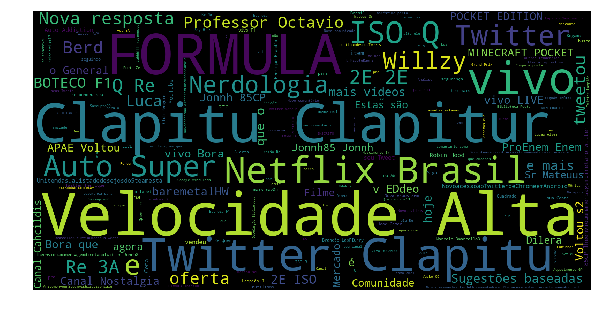

In [36]:
def nuvem_imagem(df):
    summary = df.dropna(subset=['subject'], axis=0)['subject']

    all_summary = " ".join(s for s in summary)

    stopwords = set(STOPWORDS)

    # Adicionei algumas palavras que atrapalhavam a exibição da nuvem, deixando apenas os assuntos aparecerem.
    stopwords.update(["da", "meu", "em", "você", "de", "ao", "os","um","uma","enviar","vídeo","enviou","Mensagem","Direta","acabou","está"])

    # gerar uma wordcloud
    wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

    # mostrar a imagem final
    fig, ax = plt.subplots(figsize=(10,6))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()

    plt.imshow(wordcloud);
    wordcloud.to_file("wordcloud.png")
    
nuvem_imagem(df)

Nessa imagem, podemos ver os temas que mais aparecem no meu email desde o ano de 2014. Temos a ocorrencia da frase "Velocidade Alta", que é um canal do Youtube que eu gostava muito de assistir até um tempo atrás, e do nome "Formula", referente a notificações da Newsletter da Formula 1. Temos também a presença do nome de outros canais, como Auto Super, Netflix Brasil, Nerdologia, Willzy, etc. Isso se deve ao fato da maioria dos emails que eu recebi serem notificações do Youtube.

Eu também recebo notificações de conversas do meu Twitter, o que leva a aparição do nome "Clapitu". O username de um grande amigo que eu conheci um tempo atrás, e que fala comigo através dessa rede social.

## 7. Crie e responda mais duas perguntas relacionadas aos dados obtidos. Seja criativo!

### Pergunta 1: Quantos emails automáticos o Youtube me enviou por ano?

In [37]:
# Criando dataframe apenas com os emails do Youtube
df_youtube = df.loc[df['from'] == 'noreply@youtube.com']

In [38]:
#Criando dataframe apenas com a contagem de emails enviados pelo Youtube.
df_youtube = df_youtube['data_contraria'].dt.year.value_counts().sort_index(ascending=True)
dados = {'Emails por ano':df_youtube}
df_youtube = pd.DataFrame(dados)
df_youtube

,Emails por ano
2015,478
2016,1240
2017,1426
2018,1575
2019,2189
2020,1816
2021,8


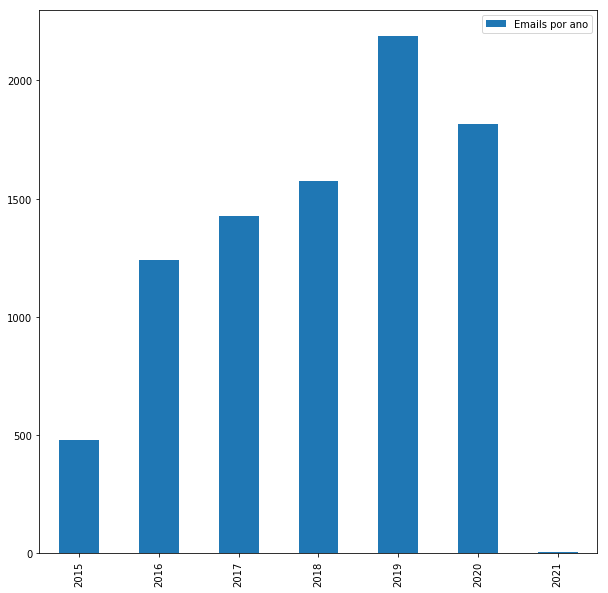

In [39]:
df_youtube.plot.bar(figsize= (10,10))

Antes da análise, achei que 2020 seria o ano com o maior número de emails, devido a pandemia e ao tempo que utilizei o Youtube nesse tempo. Mas para minha surpresa, o ano de 2019 foi o ano com o maior número, ultrapassando 2000 emails automáticos nesse período.

### Pergunta 2: Quais foram os assuntos principais do email no ano de 2015?

Escolhi esse ano pois foi uma época que eu era bem ativo na internet, mesmo com o número de emails mais baixo comparado com os outros anos (esse número mais alto nos outros anos também pode ser atribuído a grande quantidade de emails automáticos que eu recebo, o que não era muito comum em 2015), então acredito que os emails recebidos são mais "equivalentes" ao que eu acessava na época.

In [40]:
df_2015 = df.loc[df['year'] == 2015]
df_2015['from'].value_counts().head(10)

noreply@youtube.com                               478
notifications@disqus.net                           63
replyto-795248b@plus.google.com                    29
account-security-noreply@account.microsoft.com     11
KoGaMa                                             10
lukinhas.la780@gmail.com                            9
noreply-795248b@plus.google.com                     9
billing.pt@clubpenguin.com                          9
support@disneyinteractivegames.com                  8
support.pt@clubpenguin.com                          7
Name: from, dtype: int64

As notificações automáticas do Youtube estão em primeiro lugar, e em seguida podemos ver as notificações do Disqus, que era uma plataforma de comentários que eu utilizava muito. Podemos também ver o "KoGaMa", que é um jogo que eu gostava muito de acessar, assim como notificações do "Club Penguin".

Também tem alguns emails do Google Plus, visto que eu costumava usar ele na época (RIP)